## Solving Optimization Problem using IBM Decision Optimization CPLEX python API

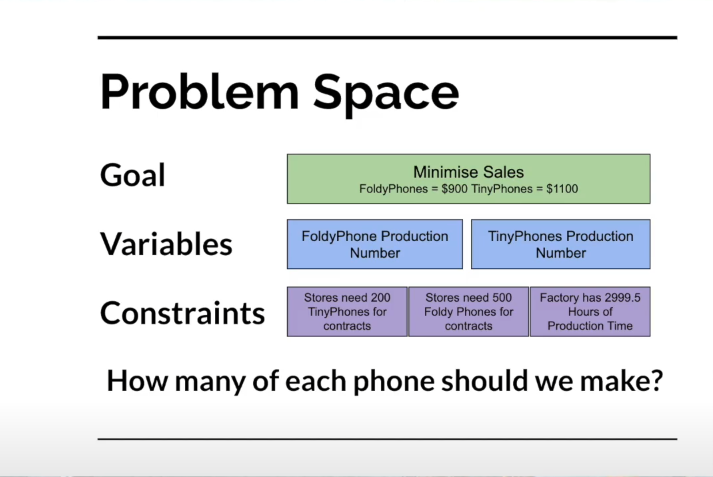

In [12]:
!pip install docplex

     |████████████████████████████████| 614kB 5.4MB/s 
  Created wheel for docplex: filename=docplex-2.19.202-cp36-none-any.whl size=670938 sha256=58e1cb9ad01d2e3755d176650acc54686457b3962464a96822f238138ea06192
  Stored in directory: /root/.cache/pip/wheels/33/bb/64/5dd51006e730eb1227b8033d1f9e2246b806d9985a70c90d99
Successfully built docplex


In [13]:
!pip install cplex

     |████████████████████████████████| 31.0MB 145kB/s 


In [3]:
from docplex.mp.model import Model

In [4]:
m = Model(name='Phone Production')

## Variables

In [5]:
# Phone Production Variables
foldyphoneproduction = m.continuous_var(name='foldy phone production')
tinyphoneproduction = m.continuous_var(name='tiny phone production')

In [6]:
# Production Time Constants
foldyphonetime = 1.5
tinyphonetime = 2

In [7]:
foldyphonesaleprice = 900
tinyphoneselesprice = 1100

## Constraints

In [8]:
foldyphontconstraint = m.add_constraint(foldyphoneproduction >= 500)
tinyphontconstraint = m.add_constraint(tinyphoneproduction >= 200)

In [9]:
# Production Constraint
totalprodconstraint = m.add_constraint(m.sum([tinyphoneproduction*tinyphonetime, foldyphoneproduction*foldyphonetime]) <= 2999.5)

## Goals/Objs

In [10]:
m.maximize(foldyphonesaleprice*foldyphoneproduction + tinyphoneselesprice*tinyphoneproduction)

In [11]:
sol = m.solve()

In [12]:
sol.display()

solution for: Phone Production
objective: 1779700.000
foldy phone production = 1733.000
tiny phone production = 200.000


## CVRP(Capacitated Vehicle Rooting Problem)

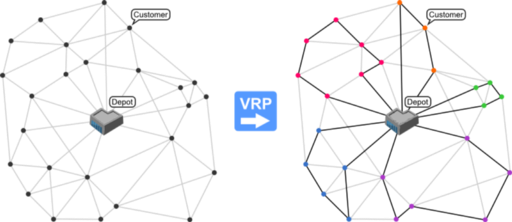



1. Making random numbers with the package Numpy and Creating an object called “rnd” for generating random numbers.
2. Initializing our parameters witch are:
- n: Number of customers.
- Q: Maximum Capacity of the Vehicle.
- N: The set of nodes.
- V: The set of nodes + the node 0 which is the depot.
- d: A collection that contains the demand of each node.
3. Initializing a random location for each node on a plot with two dimensions (x=200, y=100).
4. Plotting the initial view of our random nodes.
5. Initializing our set of arcs A and their cost c (c = The set of distances between each two nodes) . The cost in our case is the distance between each two nodes by calculating the diﬀerences between their locations in the plot.
6. Calling the CPLEX API, initializing our decisions variables, constraints and printing the solution.
7. Lastly, plotting our solution.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
np.random.seed(42)

n = 10
Q = 15
N = [i for i in range(1, n+1)]
V = [0] + N
d = {i:np.random.randint(1, 10) for i in N}

loc_x = np.random.rand(len(V))*200
loc_y = np.random.rand(len(V))*100

In [63]:
loc_x.shape, loc_y.shape

((11,), (11,))

- f-sting 포맷팅에서 아래첨자(subscript) 표기법 : ```f'text$_{{{var}}}$'```

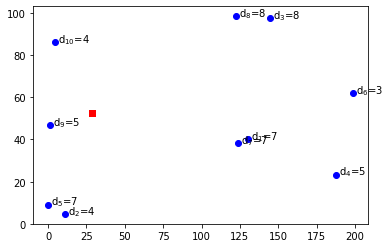

In [77]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate(f'd$_{{{i}}}$={d[i]}', (loc_x[i]+2, loc_y[i]))
    plt.plot(loc_x[0], loc_y[0], c='r', marker='s')

plt.show()

In [65]:
A = [(i, j) for i in V for j in V if i!=j]
c = {(i, j):np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}

In [66]:
from docplex.mp.model import Model

In [67]:
model = Model('CVRP')

In [68]:
x = model.binary_var_dict(A, name='x')
u = model.continuous_var_dict(N, ub=Q, name='u')

In [69]:
model.minimize(model.sum(c[i,j]*x[i,j] for i,j in A))
model.add_constraints(model.sum(x[i,j] for j in V if j!=i)==1 for i in N)
model.add_constraints(model.sum(x[i,j] for i in V if i!=j)==1 for j in N)
model.add_indicator_constraints_(model.indicator_constraint(x[i,j], u[i]+d[j]==u[j]) for i,j in A if i!=0 and j!=0)
model.add_constraints(u[i]>=d[i] for i in N)

[docplex.mp.LinearConstraint[](u_1,GE,7),
 docplex.mp.LinearConstraint[](u_2,GE,4),
 docplex.mp.LinearConstraint[](u_3,GE,8),
 docplex.mp.LinearConstraint[](u_4,GE,5),
 docplex.mp.LinearConstraint[](u_5,GE,7),
 docplex.mp.LinearConstraint[](u_6,GE,3),
 docplex.mp.LinearConstraint[](u_7,GE,7),
 docplex.mp.LinearConstraint[](u_8,GE,8),
 docplex.mp.LinearConstraint[](u_9,GE,5),
 docplex.mp.LinearConstraint[](u_10,GE,4)]

In [70]:
sol = model.solve(log_output=True)

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Found incumbent of value 1861.137206 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 2 columns.
MIP Presolve modified 44 coefficients.
Aggregator did 44 substitutions.
Reduced MIP has 76 rows, 162 columns, and 352 nonzeros.
Reduced MIP has 108 binaries, 0 generals, 0 SOSs, and 88 indicators.
Presolve time = 0.01 sec. (0.35 ticks)
Probing time = 0.00 sec. (0.35 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 76 rows, 162 columns, and 352 nonzeros.
Reduced MIP has 108 binaries, 0 generals, 0 SOSs, and 88 indicators.
Presolve time = 0.01 sec. (0.28 ticks)
Probing time = 0.00 sec. (0.35 ticks)
Clique table members: 250.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Root rel

In [71]:
sol.display()

solution for: CVRP
objective: 1087.204
x_0_1 = 1
x_0_3 = 1
x_0_5 = 1
x_0_8 = 1
x_0_10 = 1
x_1_4 = 1
x_2_0 = 1
x_3_7 = 1
x_4_6 = 1
x_5_2 = 1
x_6_0 = 1
x_7_0 = 1
x_8_0 = 1
x_9_0 = 1
x_10_9 = 1
u_1 = 7.000
u_2 = 11.000
u_3 = 8.000
u_4 = 12.000
u_5 = 7.000
u_6 = 15.000
u_7 = 15.000
u_8 = 8.000
u_9 = 9.000
u_10 = 4.000


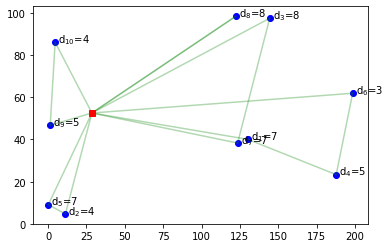

In [78]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

plt.scatter(loc_x[1:], loc_y[1:], c='b')

for i in N:
    plt.annotate(f'd$_{{{i}}}$={d[i]}', (loc_x[i]+2, loc_y[i]))
for i,j in active_arcs:
    plt.plot([loc_x[i],loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)

plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.show()